## Importing Necessary Libraries

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import os
os.chdir('drive/MyDrive/trash_contest')

In [3]:
!ls

NoSpill     oil.jpg   OilSpill.7z  water3.jpg
NoSpill.7z  OilSpill  water2.jpg   water.jpg


In [4]:
# !7z e OilSpill.7z -o"OilSpill"

In [129]:
import numpy as np # linear algebra
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import os
from PIL import Image
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
from keras.utils import np_utils

In [130]:
import cv2

In [131]:
oilspill = os.listdir("OilSpill")
print(oilspill[:10]) #the output we get are the .jpg files

nospill = os.listdir("NoSpill")
print('\n')
print(nospill[:10])

['Oilspill_083.jpg', 'Oilspill_089.jpg', 'Oilspill_085.jpg', 'Oilspill_088.jpg', 'Oilspill_081.jpg', 'Oilspill_086.jpg', 'Oilspill_082.jpg', 'Oilspill_087.jpg', 'Oilspill_084.jpg', 'Oilspill_091.jpg']


['NoSpill_001.jpg', 'NoSpill_002.jpg', 'NoSpill_003.jpg', 'NoSpill_005.jpg', 'NoSpill_007.jpg', 'NoSpill_006.jpg', 'NoSpill_004.jpg', 'NoSpill_008.jpg', 'NoSpill_015.jpg', 'NoSpill_010.jpg']


## Data Preprocessing

In [ ]:
x_test

In [44]:
image_data

In [123]:
image_data = None

In [248]:
def predict_test(filename):
    data = []
    img_read = plt.imread(filename)
    # plt.imshow(img_read)
    img_resize = cv2.resize(img_read, (100, 100))
    img_array = img_to_array(img_resize)
    img_array=img_array/255
    data.append(img_array)
    image_data = np.array(data)
    idx = np.arange(image_data.shape[0])
    np.random.shuffle(idx)
    image_data = image_data[idx]
    return model.predict(image_data)

In [251]:
print(predict_test('oil.jpg').argmax(axis=1)[0])
print(predict_test('water3.jpg').argmax(axis=1)[0])

1
0


In [219]:
data = []
labels = []
for img in oilspill:
    try:
        img_read = plt.imread("OilSpill" + "/" + img)
        img_resize = cv2.resize(img_read, (100, 100))
        img_array = img_to_array(img_resize)
        img_array=img_array/255
        data.append(img_array)
        labels.append(1)
    except:
        None
        
for img in nospill:
    try:
        img_read = plt.imread("NoSpill" + "/" + img)
        img_resize = cv2.resize(img_read, (100, 100))
        img_array = img_to_array(img_resize)
        img_array= img_array/255
        data.append(img_array)
        labels.append(0)
    except:
        None

In [220]:
image_data = np.array(data)
labels = np.array(labels)
idx = np.arange(image_data.shape[0])
np.random.shuffle(idx)
image_data = image_data[idx]
labels = labels[idx]

In [221]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(image_data, labels, test_size = 0.2, random_state = 42, stratify=labels)

In [222]:
y_train = np_utils.to_categorical(y_train,  2)
y_test = np_utils.to_categorical(y_test,  2)

In [223]:
print(f'Shape of training image : {x_train.shape}')
print(f'Shape of testing image : {x_test.shape}')
print(f'Shape of training labels : {y_train.shape}')
print(f'Shape of testing labels : {y_test.shape}')

Shape of training image : (268, 100, 100, 3)
Shape of testing image : (68, 100, 100, 3)
Shape of training labels : (268, 2)
Shape of testing labels : (68, 2)


## Architecture of the CNN model

In [227]:
import keras
from keras.layers import Dense, Conv2D
from keras.layers import Flatten
from keras.layers import MaxPooling2D, GlobalAveragePooling2D
from keras.layers import Activation
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.models import Sequential
from keras import backend as K

from keras import optimizers

In [228]:
inputShape= (100,100,3)
model=Sequential()
model.add(Conv2D(32, (3,3), activation = 'relu', input_shape = inputShape))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis =-1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation = 'relu'))
model.add(MaxPooling2D(2,2))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.2))

model.add(Flatten())
    
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Dropout(0.5))
model.add(Dense(2, activation = 'softmax'))

In [ ]:
model.summary()

In [233]:
#compile the model
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [234]:
from tensorflow.keras.callbacks import ModelCheckpoint
model_cnn_save_path = 'best_model_cnn.h5'
checkpoint_callback_cnn = ModelCheckpoint(model_cnn_save_path, 
                                      monitor='val_accuracy',
                                      save_best_only=True,
                                      verbose=1)

In [235]:
H = model.fit(x_train, y_train, 
              validation_data=(x_test, y_test), 
              epochs=30, callbacks=[checkpoint_callback_cnn])

Epoch 1/30
9/9 [==============================] - 5s 444ms/step - loss: 0.1410 - accuracy: 0.9505 - val_loss: 0.5969 - val_accuracy: 0.6029

Epoch 00001: val_accuracy improved from -inf to 0.60294, saving model to best_model_cnn.h5
Epoch 2/30
9/9 [==============================] - 4s 439ms/step - loss: 0.0802 - accuracy: 0.9855 - val_loss: 0.7539 - val_accuracy: 0.5882

Epoch 00002: val_accuracy did not improve from 0.60294
Epoch 3/30
9/9 [==============================] - 4s 423ms/step - loss: 0.0681 - accuracy: 0.9778 - val_loss: 0.5114 - val_accuracy: 0.8971

Epoch 00003: val_accuracy improved from 0.60294 to 0.89706, saving model to best_model_cnn.h5
Epoch 4/30
9/9 [==============================] - 4s 426ms/step - loss: 0.0392 - accuracy: 1.0000 - val_loss: 0.4710 - val_accuracy: 0.8676

Epoch 00004: val_accuracy did not improve from 0.89706
Epoch 5/30
9/9 [==============================] - 4s 428ms/step - loss: 0.0222 - accuracy: 0.9954 - val_loss: 0.4942 - val_accuracy: 0.7059



In [236]:
print(H.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


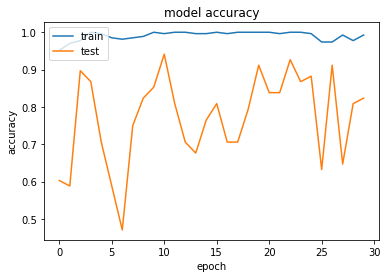

In [237]:
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

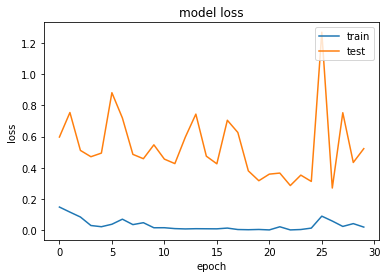

In [238]:
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper right')
plt.show()

In [243]:
model.load_weights(model_cnn_save_path)

In [244]:
# make predictions on the test set
preds = model.predict(x_test)

In [245]:
x_test.shape

(68, 100, 100, 3)

In [246]:
from sklearn.metrics import accuracy_score

print(accuracy_score(y_test.argmax(axis=1), preds.argmax(axis=1)))

0.9411764705882353


In [252]:
from sklearn.metrics import classification_report
print(classification_report(y_test.argmax(axis=1), preds.argmax(axis=1)))

              precision    recall  f1-score   support

           0       0.90      0.96      0.93        28
           1       0.97      0.93      0.95        40

    accuracy                           0.94        68
   macro avg       0.94      0.94      0.94        68
weighted avg       0.94      0.94      0.94        68



In [253]:
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
    from sklearn.metrics import confusion_matrix
    from sklearn.utils.multiclass import unique_labels
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

Confusion matrix, without normalization
[[27  1]
 [ 3 37]]


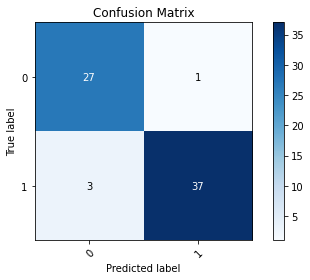

In [254]:
class_names=np.array((0,1))
plot_confusion_matrix(y_test.argmax(axis=1), preds.argmax(axis=1), classes=class_names, title='Confusion Matrix')

In [261]:
!mkdir model

mkdir: cannot create directory ‘model’: File exists


In [262]:
model.save("model")

INFO:tensorflow:Assets written to: model/assets
